In [1]:
# pip install pytest

# Lattice coordinates
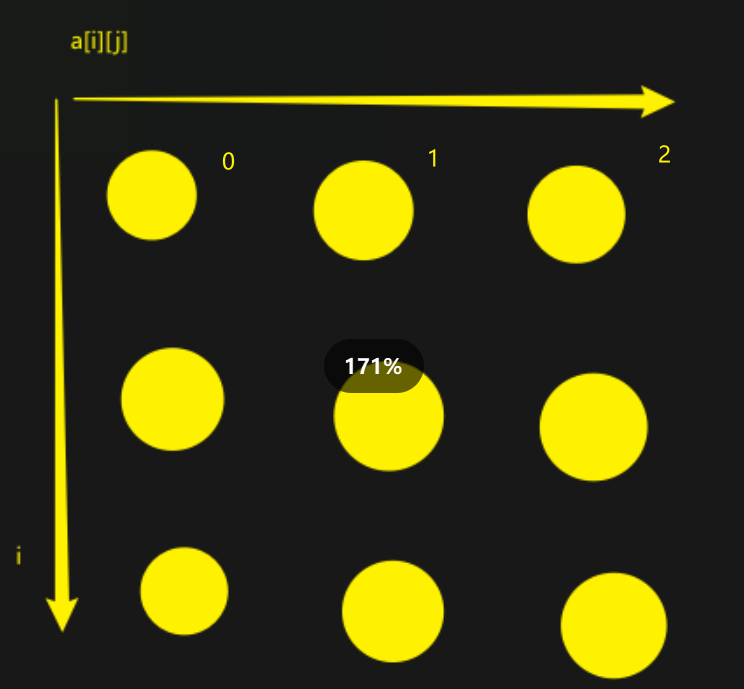

In [2]:
import IsingLatticeClass as ILC
import numpy as np

In [3]:
!pytest Pytest_week3_true.py

============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-8.1.1, pluggy-1.4.0
rootdir: d:\BaiduSyncdisk\大二下物理系\2计算物理\CP2024_code\IsingLattice
plugins: anyio-4.0.0
collected 8 items

Pytest_week3_true.py ........                                            [100%]

============================== 8 passed in 0.45s ==============================


# Ising Lattice Results

In [4]:
rows = 3
cols = 3
kb = 1

system = ILC.IsingLattice(rows, cols)
H1 = np.array(system.all_state_energy())
M1 = np.array(system.all_state_magnetization())
print(system.all_property_compute(T=1/kb, 
                            compute_H=False,
                            compute_H2=False, 
                            compute_M=False,
                            compute_M2=True,
                            compute_C=True,))

print('H',H1)
print(len(H1))
print('M',M1)

# inverse H array
H_inv = np.array([H1[i] for i in range(len(H1)-1, -1, -1)])
M_inv = np.array([M1[i] for i in range(len(M1)-1, -1, -1)])

# save H,M together as excel
import pandas as pd
df = pd.DataFrame({'H':H1, 'M':M1, 'H_inv':H_inv, 'M_inv':M_inv})
df.to_excel('H_M.xlsx', index=False)

print('Z',np.sum(np.exp(-H1/kb)))
print('E',np.sum(H1*np.exp(-H1/kb))/np.sum(np.exp(-H1/kb)))

{'Z': 131737262.01527628, 'average_H': -17.973978581531256, 'average_H2': 323.2799137621746, 'average_M': 1.7763568394002505e-15, 'average_M2': 0.9986920259314419, 'average_C': 0.024000856981141776}
H [-18. -10. -10.  -6. -10.  -6.  -6.  -6. -10.  -6.  -2.  -2.  -2.  -2.
   2.  -2. -10.  -2.  -6.  -2.  -2.   2.  -2.  -2.  -6.  -2.  -2.  -2.
   2.   2.   2.  -2. -10.  -2.  -2.   2.  -6.  -2.  -2.  -2.  -6.  -2.
   2.   2.  -2.  -2.   2.  -2.  -6.   2.  -2.   2.  -2.   2.  -2.  -2.
  -6.  -2.  -2.  -2.  -2.  -2.  -2.  -6. -10.  -6.  -2.  -2.  -2.  -2.
   2.  -2.  -6.  -6.   2.  -2.   2.  -2.   6.  -2.  -2.   2.   2.   2.
   6.   6.   6.   2.  -2.  -2.   2.  -2.   6.   2.   6.  -2.  -2.   2.
   6.   6.   2.   2.   6.   2.  -2.  -2.   6.   2.   2.  -2.   6.  -2.
   2.   6.   6.   6.   6.   6.   6.   2.  -2.  -2.   2.  -2.   2.  -2.
   2.  -6. -10.  -2.  -6.  -2.  -2.   2.  -2.  -2.  -2.   2.   2.   2.
   6.   6.   6.   2.  -6.   2.  -6.  -2.   2.   6.  -2.  -2.  -2.   2.
  -2.  -2.   6.   

In [5]:
# rows = 5
# cols = 5
# kb = 1

# system = ILC.IsingLattice(rows, cols)
# system.all_property_compute(T=2.5/kb, 
#                             compute_H=False,
#                             compute_H2=False, 
#                             compute_M=False,
#                             compute_M2=True,
#                             compute_C=True,)

In [6]:
n = [2,3,4]
T = np.arange(0.1, 3.5, 0.1)

C = np.zeros((len(n), len(T)))
M = np.zeros((len(n), len(T)))

for i in range(len(n)):
    system = ILC.IsingLattice(n[i], n[i])

    for j in range(len(T)):
        results = system.all_property_compute(T[j], 
                                compute_H=False,
                                compute_H2=False, 
                                compute_M=False,
                                compute_M2=True,
                                compute_C=True,)
        C[i,j] = results['average_C']
        M[i,j] = results['average_M2']
    

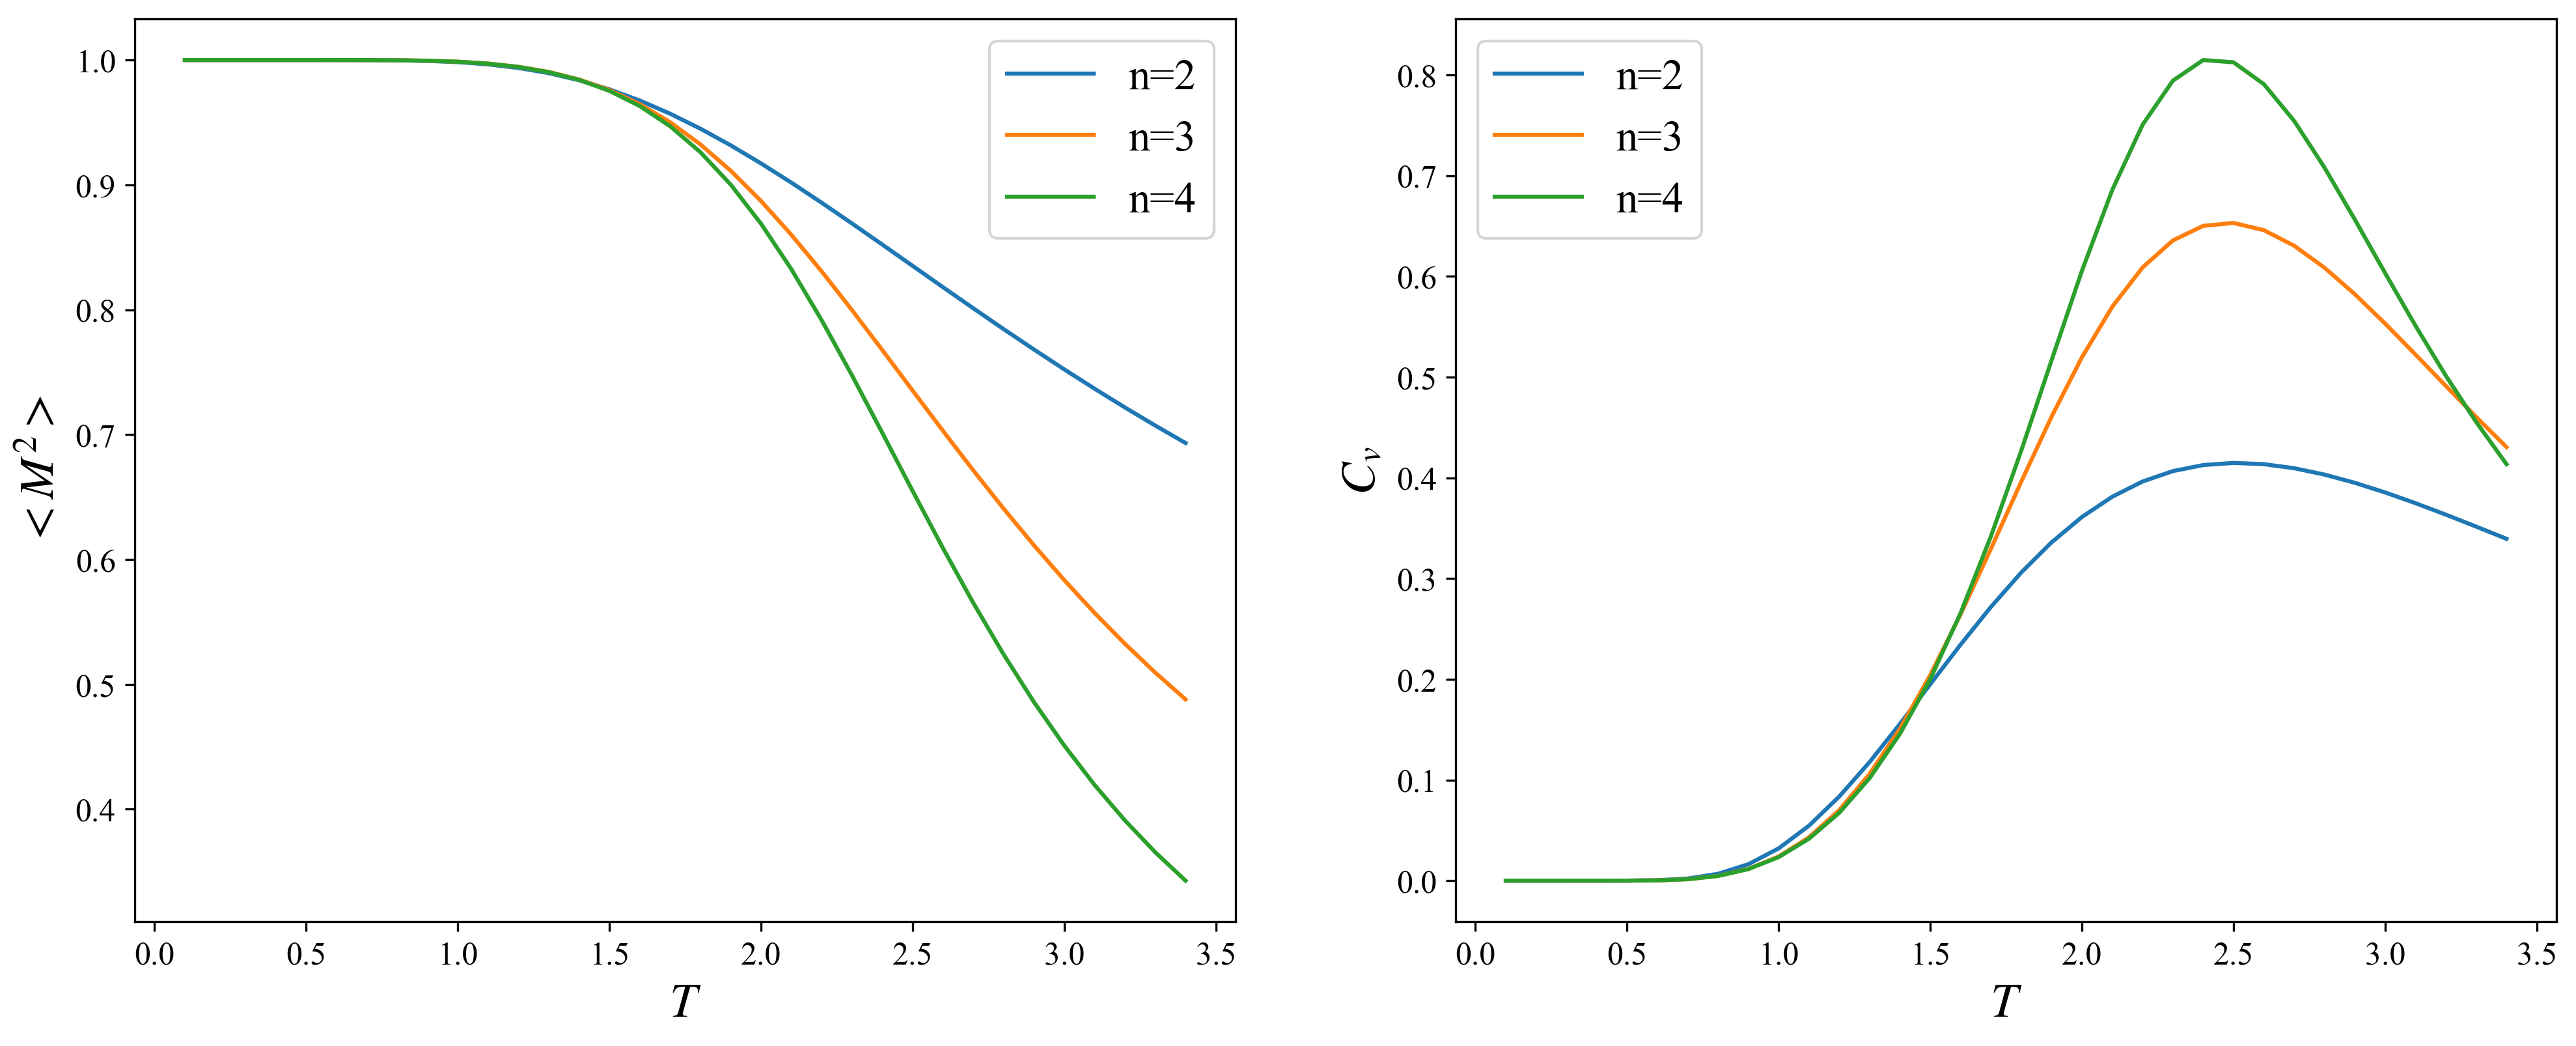

In [7]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

# 创建画布和坐标轴
fig= plt.figure(figsize=(16,6),dpi=300)

plt.subplot(121)
plt.plot(T, M[0,:], label='n=2')
plt.plot(T, M[1,:], label='n=3')
plt.plot(T, M[2,:], label='n=4')

plt.legend(fontsize=16)
plt.xlabel('$T$', fontsize=18)
plt.ylabel('$<M^2>$', fontsize=18)

plt.subplot(122)
plt.plot(T, C[0,:], label='n=2')
plt.plot(T, C[1,:], label='n=3')
plt.plot(T, C[2,:], label='n=4')

plt.legend(fontsize=16)
plt.xlabel('$T$', fontsize=18)
plt.ylabel('$C_v$', fontsize=18)

plt.savefig(r'D:\BaiduSyncdisk\大二下物理系\2计算物理\CP2024_code\picture\data\Cv_M2.png')

# Ising Lattice class test

JO
 1.0

num_spin
 36

state
 [[ 1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]]

maxrep_spin
 68719476735

energy
 -56.0

magnetization
 -32

index
 21

neighbour
 {'up:index30': -1, 'right': -1, 'down': -1, 'left': -1, 'current': 1}


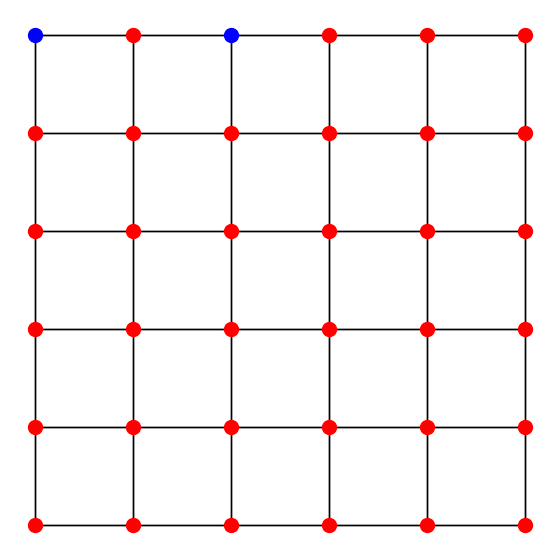

In [8]:
# Example usage:

rows = 6
cols = 6
system = ILC.IsingLattice(rows, cols)

configurations = 5
system.set_spin_configuration(configurations)

# constant
print('JO\n', system.JO())
print('\nnum_spin\n', system.num_spins())
print('\nstate\n', system.get_spin_state_all())
print('\nmaxrep_spin\n', system.maxrep_stateQ())

# property
print('\nenergy\n', system.calculate_total_energy())
print('\nmagnetization\n', system.calculate_total_magnetization())

# choose one
print('\nindex\n',system.get_index(3,3))
print('\nneighbour\n', system.get_neighbours(0, 0))
system.get_picture_of_spin('try1')


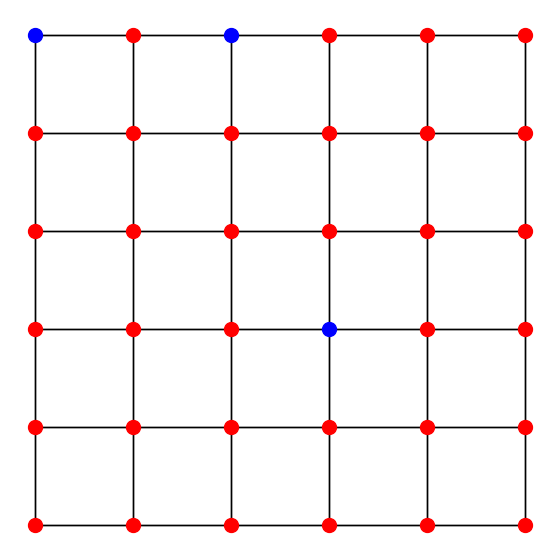

In [9]:
system.set_up_spin(3,3)
system.get_picture_of_spin('try2')

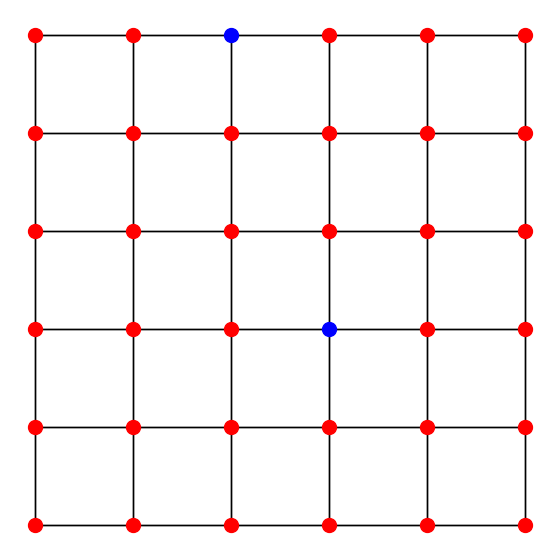

In [10]:
system.set_dw_spin(0,0)
system.get_picture_of_spin('try3')

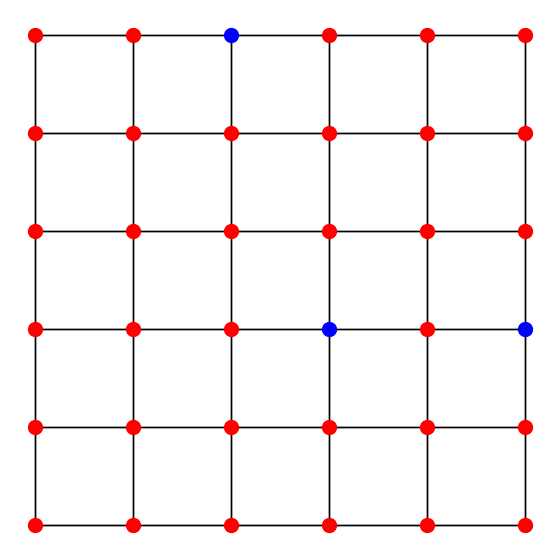

In [11]:
system.flip_spin(3,5)
system.get_picture_of_spin('try4')

In [12]:
# property
print('\nenergy\n', system.calculate_total_energy())
print('\nmagnetization\n', system.calculate_total_magnetization())

system.change_J(-2)
print('\nJO\n', system.JO())

# property
print('\nenergy\n', system.calculate_total_energy())
print('\nmagnetization\n', system.calculate_total_magnetization())



energy
 -48.0

magnetization
 -30

JO
 -2

energy
 96.0

magnetization
 -30
